# Drawing phylogenetic trees in R (ggtree)

In [1]:
library(phangorn)
library(ggtree)
library(ggnewscale)
library(colorspace)
library(RColorBrewer)
library(ape)


Loading required package: ape

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

ggtree v3.2.0  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution. 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628




Attaching package: ‘ggtree’


The following object is masked from ‘package:ape

About ggtree: 

> ‘ggtree’ extends the ‘ggplot2’ plotting system which implemented the grammar of graphics. ‘ggtree’ is designed for visualization and annotation of phylogenetic trees and other tree-like structures with their annotation data. https://github.com/YuLab-SMU/ggtree


## Example data 

I prefer to make worked examples from real data. Many common problems I encounter do not appear in simulated/toy datasets. To that end I have chosen some genomes from *Salmonella enterica* serovar Minnesota. We discussed these in a recent publication: Alikhan et al. (2022) Dynamics of *Salmonella enterica* and antimicrobial resistance in the Brazilian poultry industry and global impacts on public health. PLoS Genet 18(6): e1010174. https://doi.org/10.1371/journal.pgen.1010174

This does not directly correspond to the Minnesota (clade 1) tree in the paper, so do not expect it to match. 

The raw data is here if you want to follow along:

* [Table of metadata - tab delimited](./minne.06.22.tsv)
* [Phlyogenetic tree - newick format](./minne.06.22.nwk)


# Making a basic tree with coloured tips

The most basic annotate tree with coloured tips for countries with an included key/legend and scale.
In terms of configuring the tree scale:

* Position with x,y. 
* Width is the length of the tree scale
* Offset is the relative position of the line and the text

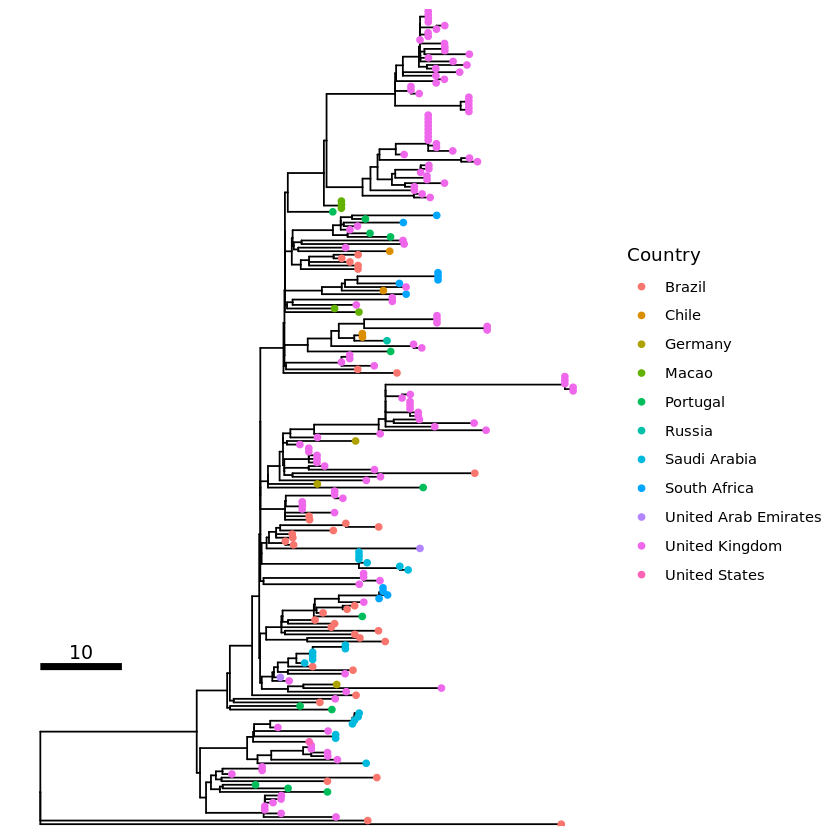

In [2]:
options(repr.plot.width=7, repr.plot.height=7) ; par(oma=c(0,0,0,0)) # Change height/width to rescale your figure

# Load in metadata, it is tab delimited hence we use `sep` 
info <- read.csv("minne.06.22.tsv", sep="\t", header=TRUE)

# Load in the newick file
all_tree <- read.tree("minne.06.22.nwk") 
all_tree <- root(all_tree, 'SAL_AB9236AA_AS') # This is an outgroup I picked for the tree.

# Just shrinking some long branches so it's clearer
# Don't distort your actual data this way without good reason. 
all_tree$edge.length[all_tree$edge.length  > 100  ]  <- 100 

p1 <- ggtree(all_tree) %<+% info + 
    geom_tippoint(aes(color=Country)) + # Colour code the tips with country
    # Adding in a scale
    geom_treescale(x=0, y=45, fontsize=4, linesize=2, offset=2, width=10)

plot(p1)


## Adding tip labels 
Tip labels can be tricky. Some trees, like this example one, can look very cluttered when tip labels are shown. I do not believe there is an easy fix for this. If you do encounter this problem you can try:

* Increasing the figure scale. You can recale the figure with the repl options i.e. `options(repr.plot.width=7, repr.plot.height=7)`. 
* Align the labels to the left (shown below with `as_ylab`)
* Use a different tree layout. i.e. `ggtree(tree, layout="circular")`, see section on Choosing a layout

For rectangular and dendrogram layouts you can use `as_ylab` to align all the labels to the edge. 

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



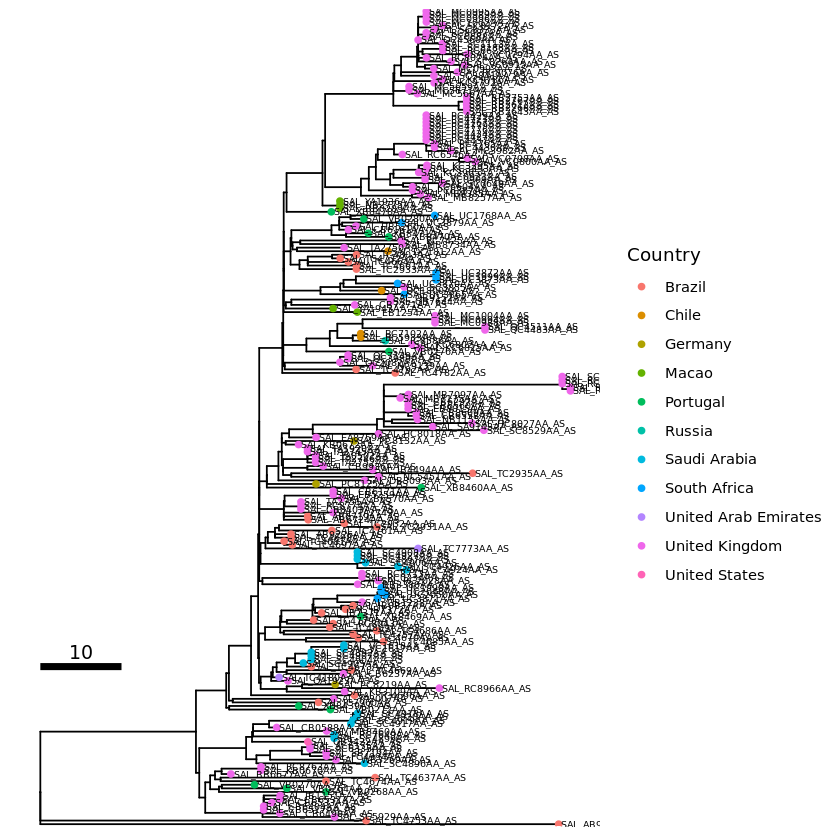

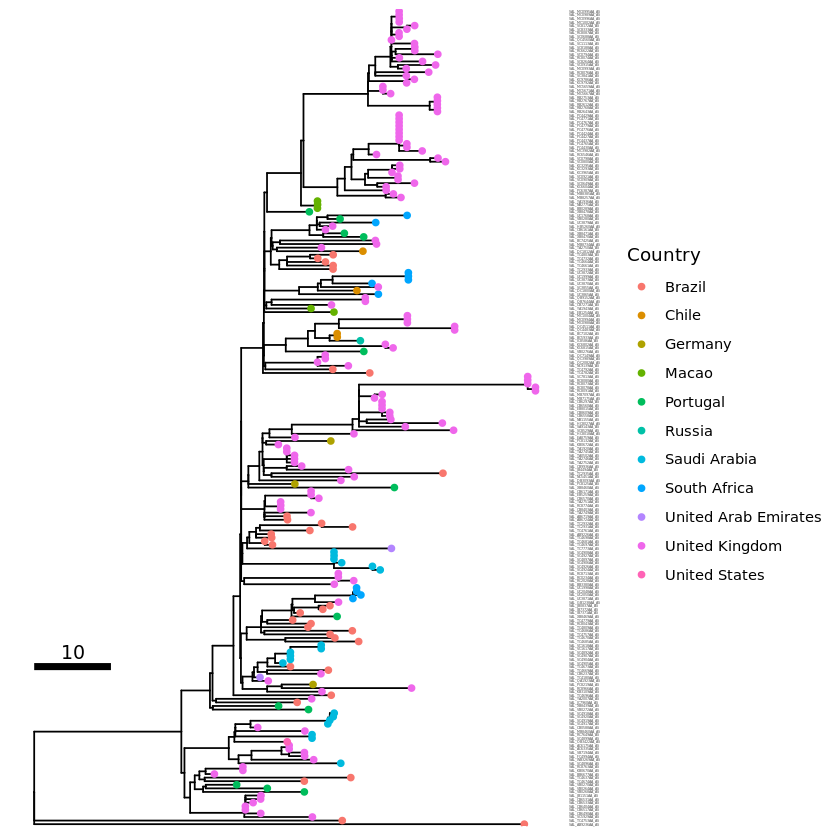

In [150]:
options(repr.plot.width=7, repr.plot.height=7)

tip_label1 <- p1 + geom_tiplab(size=2)

plot(tip_label1)

tip_label2 <- p1 + geom_tiplab(size=2,  as_ylab=TRUE)

plot(tip_label2)



# Choosing a layout

Different layouts have different benefits and drawbacks. Layouts can support different number of tips on the figure. In general, rectangular displays the data most clearly, but circular layouts can fit more tips (and labels) before it becomes cluttered. In practice I would start with a rectangular layout (like the basic sampel above) and if it is too cluttered, I would then try a circular layout. 

There are other layouts, but I avoid these for different reasons. Of these, daylight and equal angle can look very pretty but cannot show more than tens of tips. They also cannot indicate the root clearly, which can be a problem for people who insist
that all phylogenetic trees must have a root. I do not strictly agree with this. Phylogenies can be used to just to illustrate which taxa cluster with which, and in that case an unrooted tree is fine. The author, in that case, should clearly state they are not trying to determine which clade came first (evolutionary speaking) just that the clades are there.

Here are some limits to help you pick the best layout given the number of tips in the tree:

| Layout            | Maximum number of tips  | Maximum number of tips (with labels) |
|-------------------|-------------------------|--------------------------------------|
| Equal angle       | 50                      | 20                                   |
| Daylight          | 100                     | 50                                   |
| Rectangle/slanted | 300                     | 100                                  |
| Circular          | 800                     | 300                                  |


You can also draw the tree ignoring branch lengths, which might make it easier to show the topology. e.g. `ggtree(tree, layout="daylight", branch.length = 'none')`. In that case, be sure to state clearly that the branch lengths are not to scale.

See https://xiayh17.gitee.io/treedata-book/chapter4.html section 4.2.2 for different layouts you can choose. 

Average angle change [1] 0.169574040645747

Average angle change [2] 0.0650481363535316

Average angle change [3] 0.0309442967343237



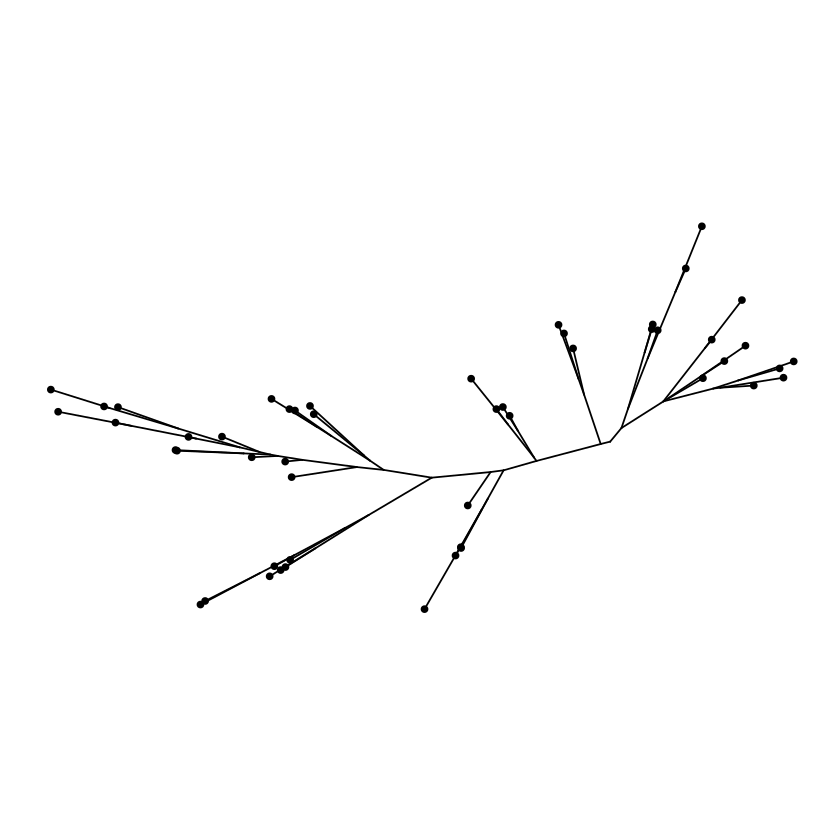

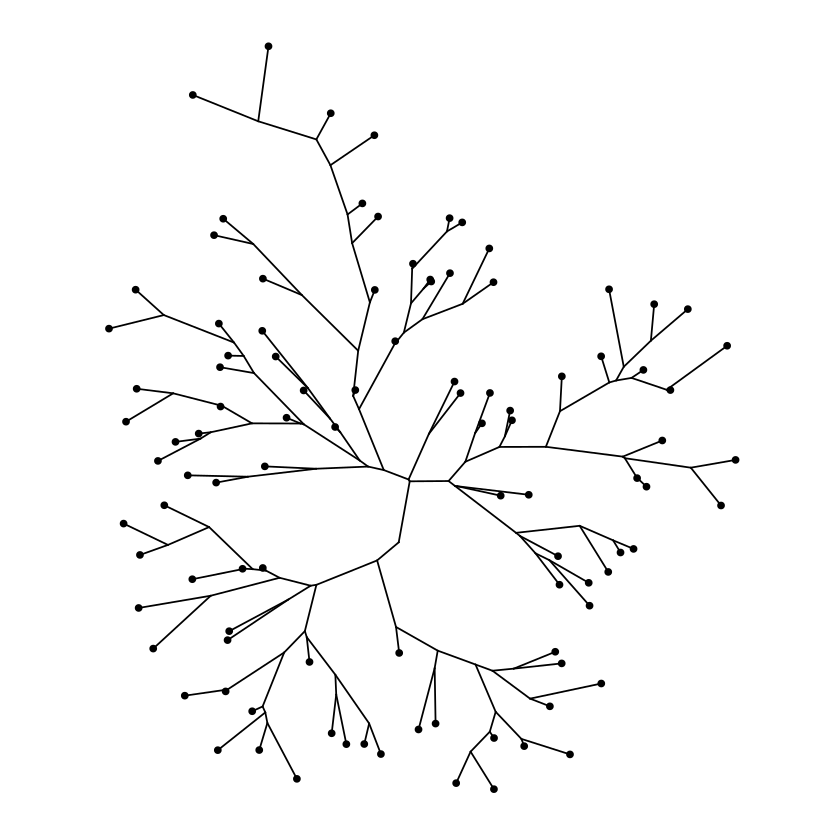

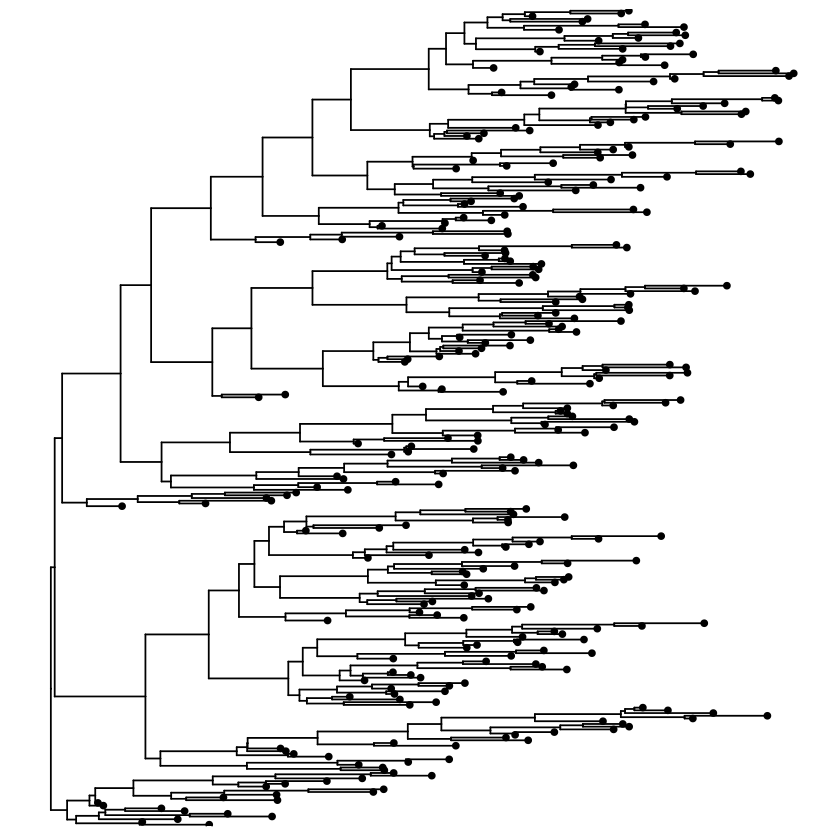

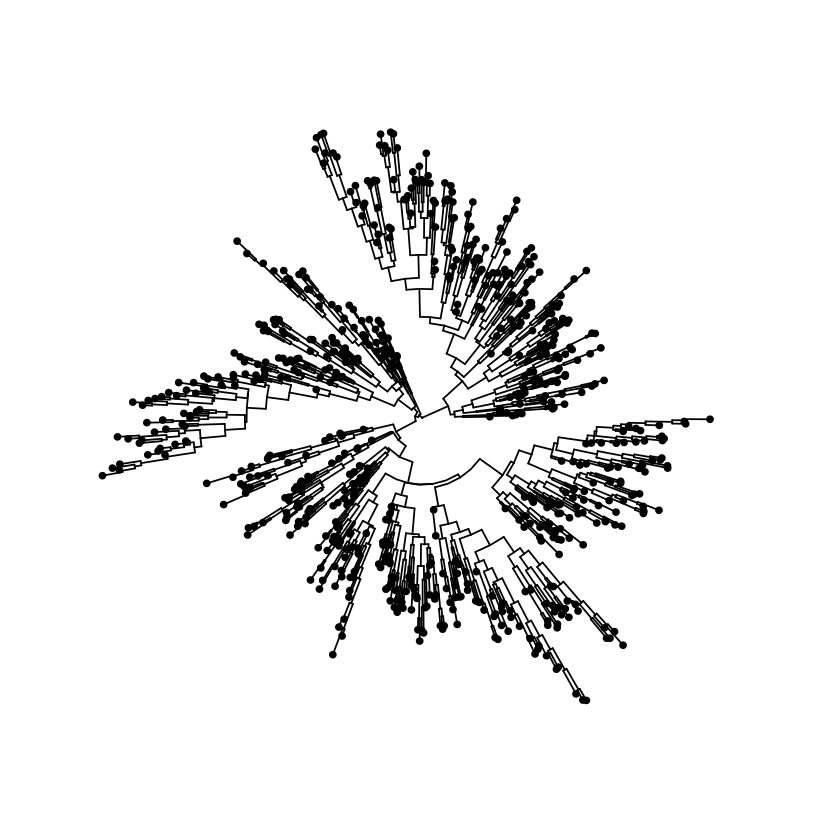

In [142]:
# Examples without tip labels - with randomly generate tree data

options(repr.plot.width=7, repr.plot.height=7) ; par(oma=c(0,0,0,0)) # Change height/width to rescale your figure

my_tree = rtree(50)
ggtree(my_tree, layout="equal_angle") + geom_tippoint()

my_tree = rtree(100)
ggtree(my_tree, layout="daylight") + geom_tippoint()

my_tree = rtree(300)
ggtree(my_tree) + geom_tippoint()

my_tree = rtree(700)
ggtree(my_tree, layout="circular")  + geom_tippoint()

Average angle change [1] 0.18665965150584

Average angle change [2] 0.0691422475934321

Average angle change [3] 0.0286671030981092



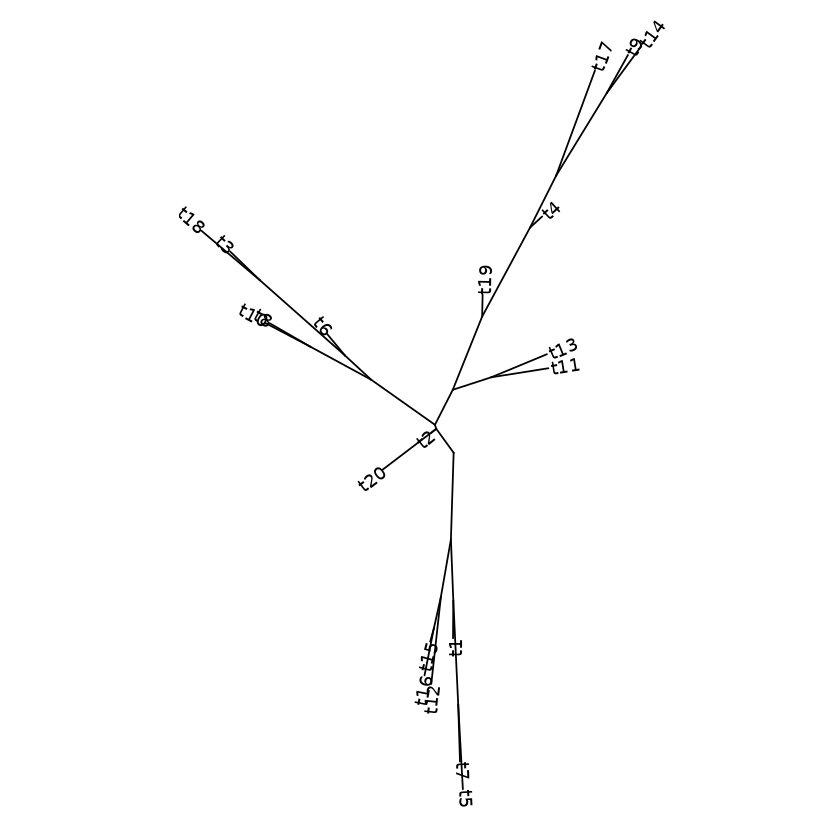

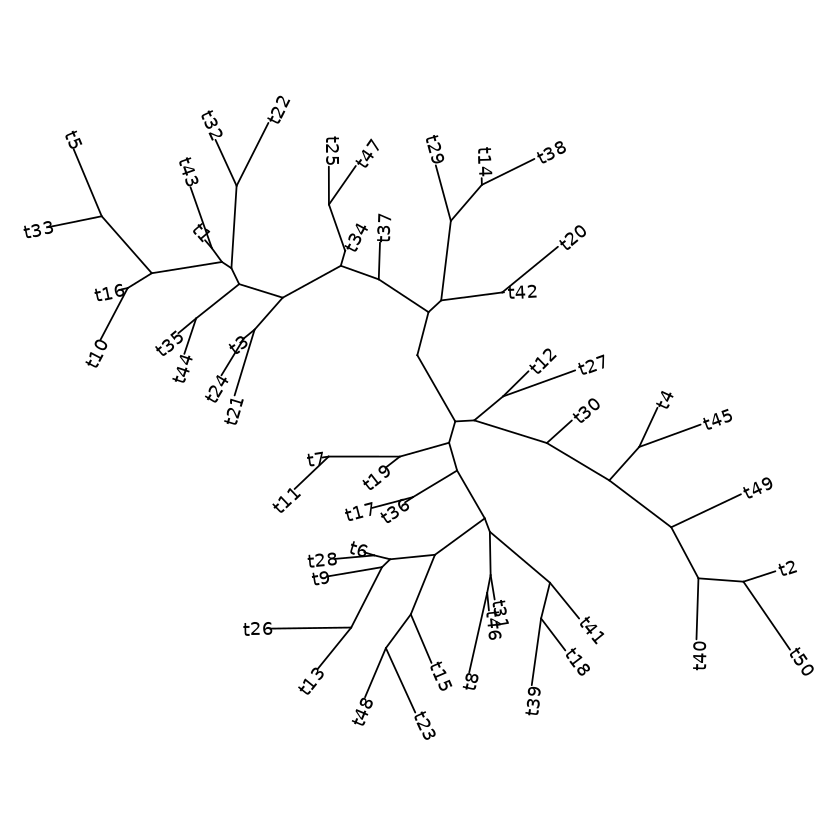

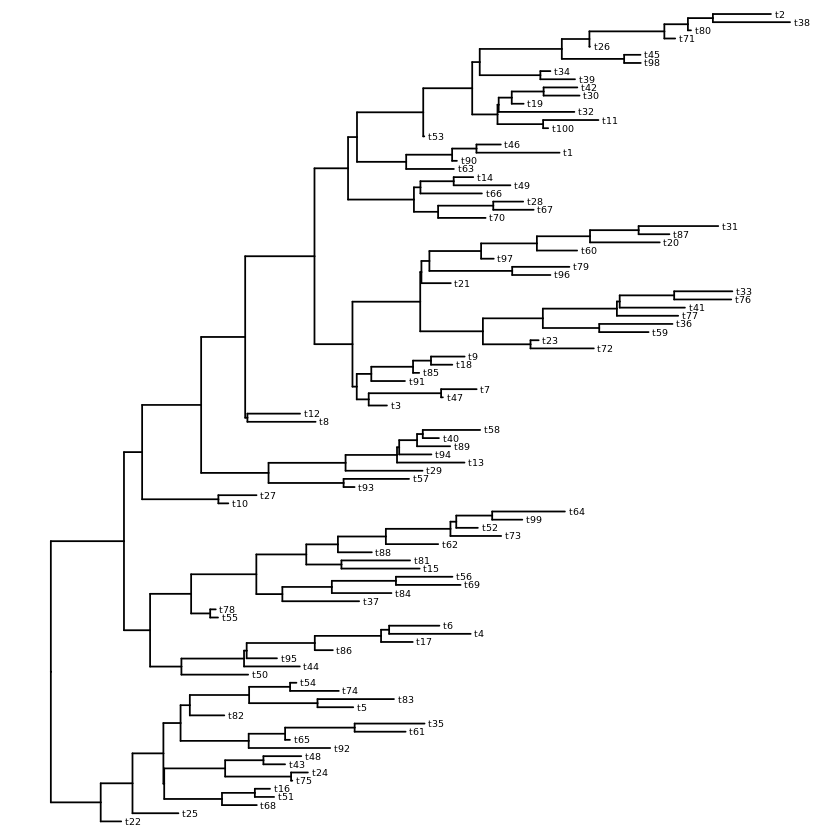

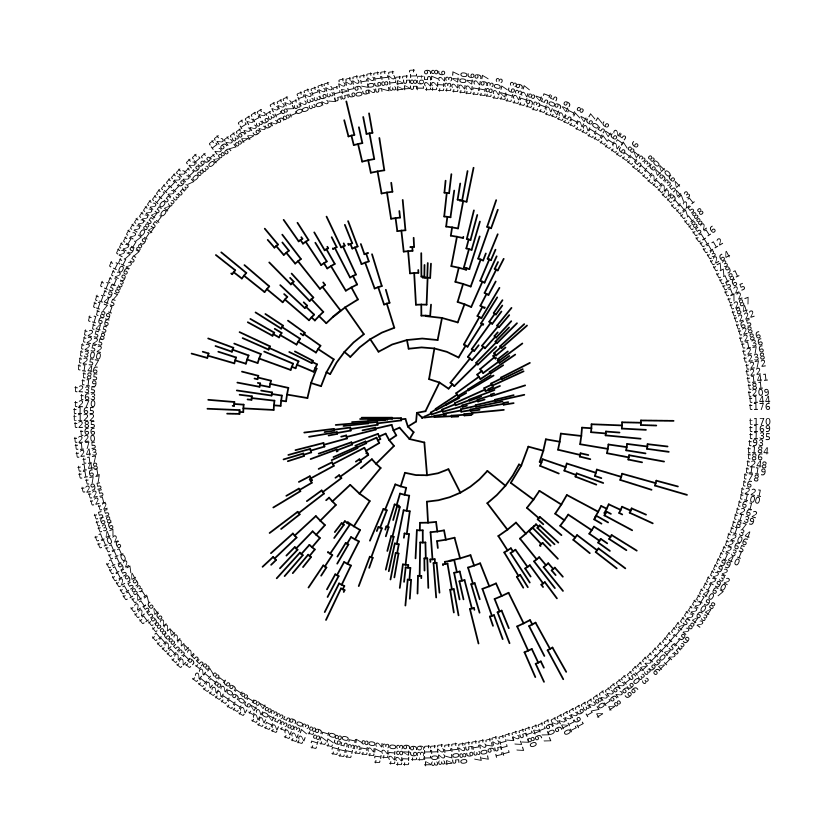

In [143]:
# Examples with tip labels  - with randomly generate tree data

options(repr.plot.width=7, repr.plot.height=7) ; par(oma=c(0,0,0,0)) # Change height/width to rescale your figure

my_tree = rtree(20)
ggtree(my_tree, layout="equal_angle") + geom_tiplab() 

my_tree = rtree(50)
ggtree(my_tree, layout="daylight") + geom_tiplab()
my_tree = rtree(100)
ggtree(my_tree) + geom_tiplab(size=2) 
my_tree = rtree(300)
ggtree(my_tree, layout="circular") + 
    geom_tiplab(align=T, linetype=NA, size=2)

# Basic circular tree 


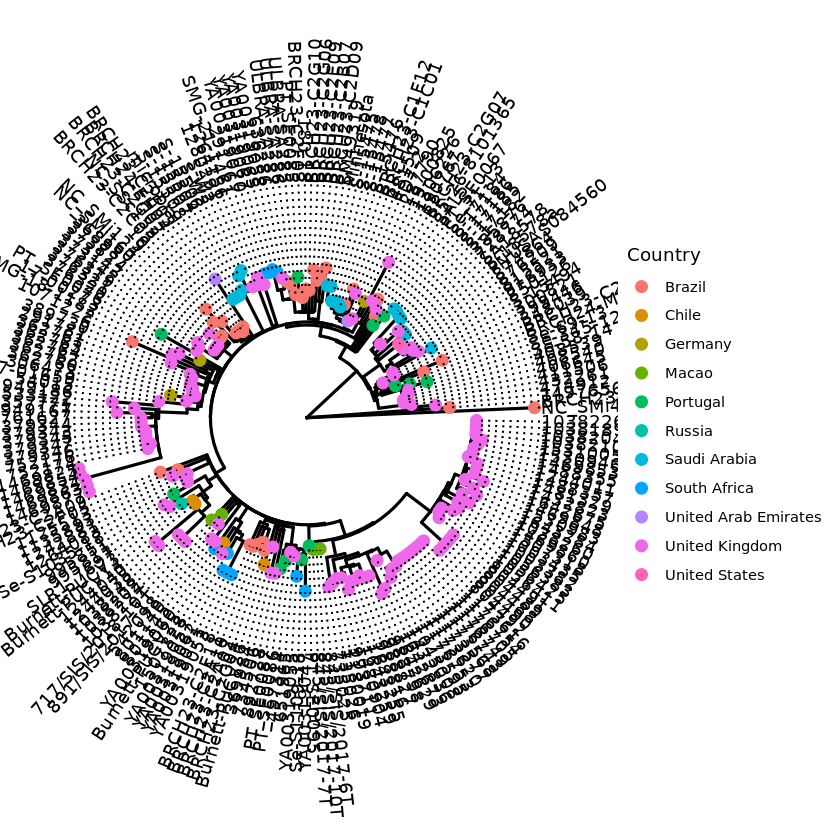

In [144]:

p1 <- ggtree(all_tree, size=0.9, layout='circular') %<+% info + 
    geom_tippoint(aes(color=Country), size=3) + 
    geom_tiplab(aes(label=Name), align=T)
plot(p1)


In [145]:
# Adding a heatmap

Warning message:
“Ignoring unknown parameters: angle”
Warning message:
“Ignoring unknown parameters: angle”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



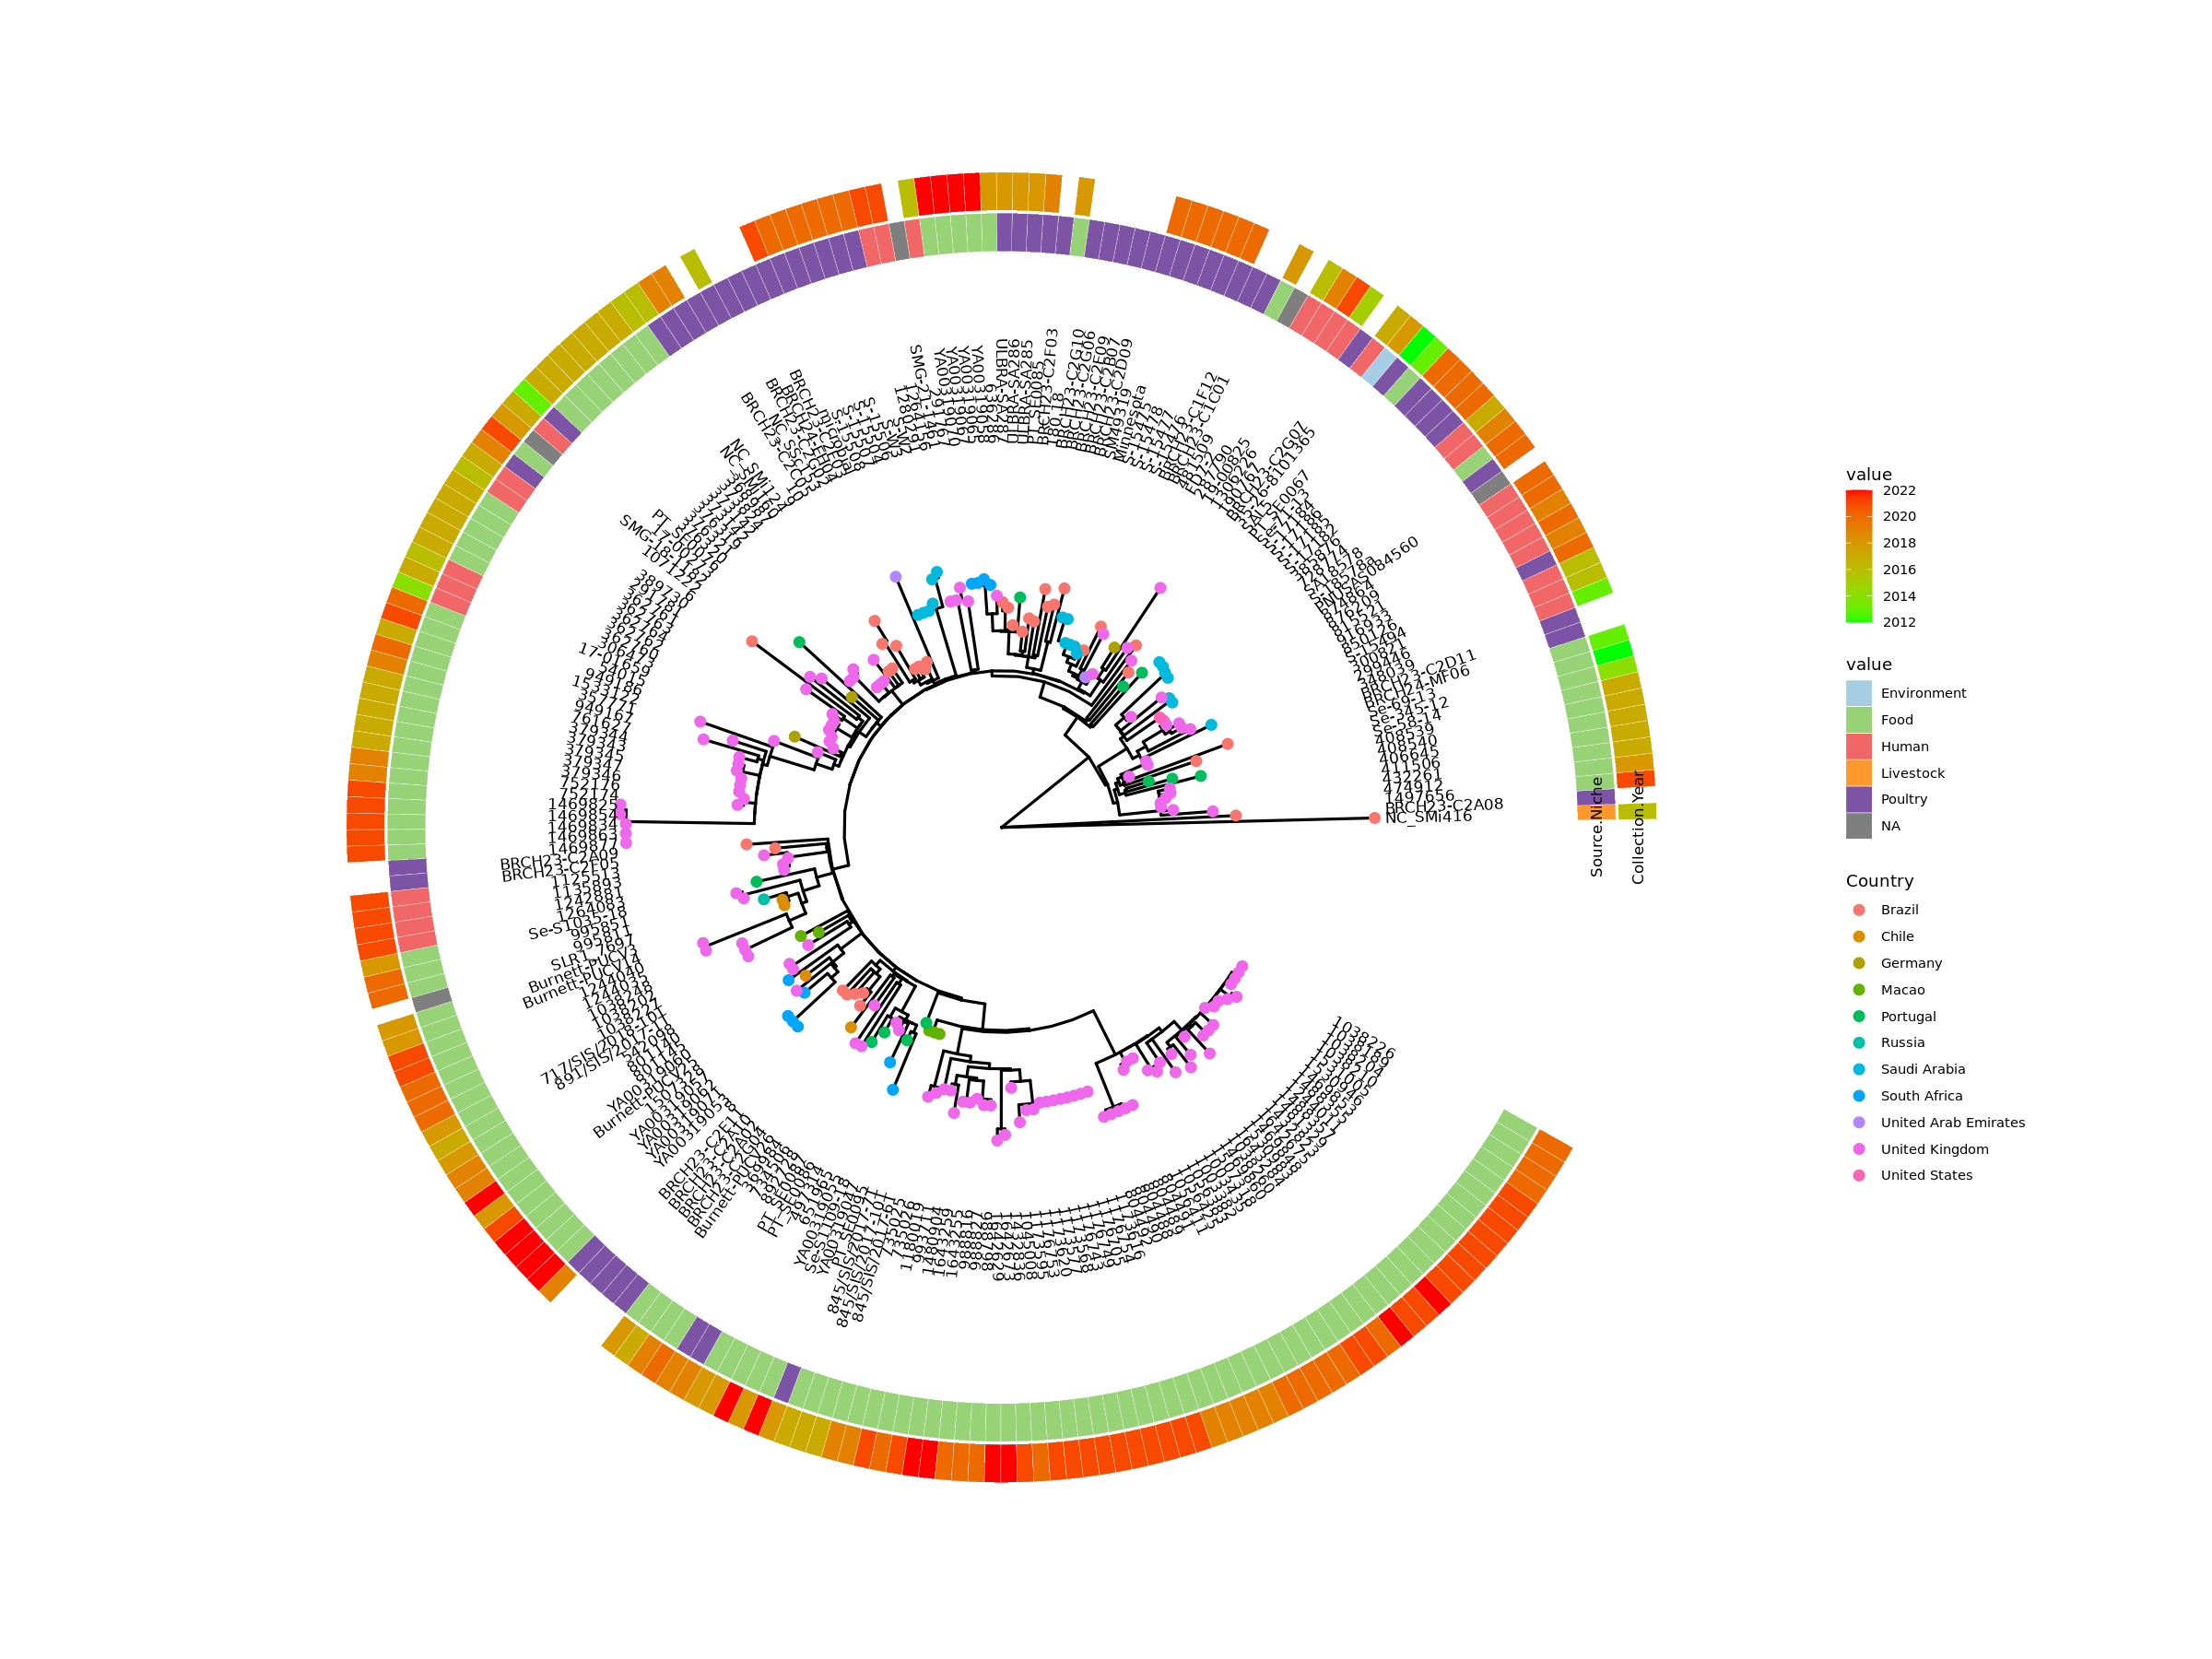

In [146]:
options(repr.plot.width=20, repr.plot.height=15) ; par(oma=c(0,0,0,0))
info <- read.csv("minne.06.22.tsv", sep="\t", header=TRUE)

unique_country = length(unique(info[['Country']]))

all_tree <- read.tree("minne.06.22.nwk")
all_tree <- root(all_tree, 'SAL_AB9236AA_AS')
all_tree$edge.length[all_tree$edge.length  > 100  ]  <- 100

p1 <- ggtree(all_tree, size=0.9, layout='fan', open.angle=30, angle=-30) %<+% info + 
    geom_tippoint(aes(color=Country), size=3) + 
    geom_tiplab(aes(label=Name), align=T, linetype=NA, size=3.5, offset=0.00002, hjust=0.001)

unique_year = length(unique(info[['Collection.Year']]))
unique_niche = length(unique(info[['Source.Niche']]))

getPalette_year = rev( colorRampPalette(brewer.pal(11,"RdYlGn"))(unique_year))
getPalette_niche = colorRampPalette(brewer.pal(12,"Paired"))(unique_niche)

info <- read.csv("minne.06.22.tsv", sep="\t", header=TRUE, row.names=1)


pheat <- gheatmap(p1, info['Source.Niche'], offset=30, colnames_angle=90, width=0.1, font.size=3.5) +
    scale_fill_manual(values=getPalette_niche) 
pheat <- pheat + new_scale_color()  + new_scale_fill()
pheat <- gheatmap(pheat, info['Collection.Year'], colnames_angle=90, width = 0.1, offset = 37, font.size=3.5)

plot(pheat)